In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 3)
np.set_printoptions(linewidth=1000)

In [2]:
MPRA_df_stack = pd.read_csv('../data/SirajMPRA/SirajMPRA_562654_stack.csv')
MPRA_df_stack

,description,seq,A549,HepG2,K562,SK-N-SH,HCT116,is_ref,chr,pos,ref,alt,start,end,585605_index,HepG2_DNase,HepG2_H3K4me1,HepG2_H3K4me3,HepG2_H3K9me3,HepG2_H3K27me3,HepG2_H3K27ac,HepG2_H3K36me3,HepG2_CTCF,K562_DNase,K562_H3K4me1,K562_H3K4me3,K562_H3K9me3,K562_H3K27me3,K562_H3K27ac,K562_H3K36me3,K562_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me1,SK-N-SH_H3K4me3,SK-N-SH_H3K9me3,SK-N-SH_H3K27me3,SK-N-SH_H3K27ac,SK-N-SH_H3K36me3,SK-N-SH_CTCF,A549_DNase,A549_H3K4me1,A549_H3K4me3,A549_H3K9me3,A549_H3K27me3,A549_H3K27ac,A549_H3K36me3,A549_CTCF,HCT116_DNase,HCT116_H3K4me1,HCT116_H3K4me3,HCT116_H3K9me3,HCT116_H3K27me3,HCT116_H3K27ac,HCT116_H3K36me3,HCT116_CTCF
0,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.256,-1.092,0.156,-0.223,True,chr1,14677,G,A,14577,14777,0,1.313,1.209,1.923,0.779,2.484,1.661,2.092,1.207,1.434,1.857,2.131,2.178,2.211,1.846,1.891,1.453,1.430,NaN,2.076,NaN,2.219,1.373,1.631,1.184,1.121,1.384,2.139,2.259,2.374,1.727,1.780,1.287,0.921,1.231,2.038,0.887,1.550,1.624,1.946,1.171
1,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,-0.003,0.068,0.066,-0.719,False,chr1,14677,G,A,14577,14777,1,1.294,1.236,1.913,0.762,2.495,1.664,2.110,1.235,1.412,1.844,2.114,2.147,2.189,1.854,1.864,1.473,1.373,NaN,2.010,NaN,2.215,1.342,1.631,1.187,1.108,1.362,2.092,2.203,2.313,1.698,1.719,1.309,0.913,1.179,2.004,0.789,1.485,1.597,1.908,1.197
2,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,0.877,-0.803,0.354,0.821,True,chr1,63697,T,C,63597,63797,2,1.026,1.371,1.174,0.130,0.524,0.922,0.086,0.409,0.319,0.198,0.462,-0.438,0.668,0.157,0.617,0.078,-0.110,NaN,1.122,NaN,-0.050,1.787,0.537,0.378,1.392,1.241,1.204,0.145,0.882,0.838,0.937,0.314,0.911,1.095,0.640,-0.177,1.205,0.795,0.211,0.206
3,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,0.756,-1.050,-0.154,0.766,False,chr1,63697,T,C,63597,63797,3,1.022,1.274,0.990,0.335,0.480,0.783,0.053,0.411,0.224,0.079,0.305,-0.415,0.611,0.004,0.595,0.037,-0.260,NaN,0.820,NaN,-0.022,1.525,0.580,0.285,1.384,1.097,0.969,0.173,0.751,0.632,0.989,0.298,0.925,1.043,0.513,-0.162,0.894,0.676,0.277,0.188
4,chr1:64764:C:T,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.649,-0.449,0.119,-0.114,True,chr1,64764,C,T,64664,64864,4,-0.988,-0.600,-0.719,0.185,-0.474,-0.858,-0.848,-0.901,-0.765,-0.785,-0.781,-1.259,-0.531,-0.662,-0.968,-0.709,-0.835,NaN,-0.579,NaN,-0.892,-0.424,-1.130,-0.776,-1.083,-0.762,-0.813,-0.991,0.105,-0.803,-0.624,-0.821,-0.935,-0.916,-0.818,0.435,0.415,-0.736,-1.276,-0.686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562649,chrX:155233098:T:C,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,0.203,1.334,0.397,0.749,False,chrX,155233098,T,C,155232998,155233198,585600,2.066,2.489,2.190,0.419,1.252,2.592,1.194,1.500,1.432,1.627,1.429,1.534,1.026,1.501,1.212,1.084,1.033,NaN,0.972,NaN,1.426,0.688,1.553,0.994,1.518,2.130,2.014,0.877,0.901,2.117,0.660,1.190,1.159,1.561,1.521,-1.286,0.266,1.322,1.346,0.979
562650,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.021,0.070,2.294,1.259,True,chrX,155233794,A,G,155233694,155233894,585601,0.844,0.886,1.232,0.873,0.177,0.820,1.057,0.878,0.668,0.424,0.696,0.436,0.450,0.611,1.729,0.373,1.408,NaN,1.844,NaN,0.849,2.360,1.388,1.255,1.744,1.724,1.473,0.836,0.536,1.525,1.424,0.911,1.858,1.976,1.727,-0.630,1.291,1.653,1.009,0.885
562651,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,0.490,-0.510,1.487,0.482,False,chrX,155233794,A,G,155233694,155233894,585602,0.810,1.034,1.391,0.815,0.714,0.957,1.205,0.843,0.601,0.528,0.870,0.488,0.796,0.746,1.662,0.405,1.332,NaN,1.759,NaN,1.025,1.878,1.365,1.126,1.374,1.373,1.496,0.829,1.060,1.356,1.477,0.833,1.471,1.646,1.782,-0.341,1.285,1.487,1.148,0.733
562652,chrX:155234730:T:C,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCAT

In [3]:
MPRA_df_stack

,description,seq,A549,HepG2,K562,SK-N-SH,HCT116,is_ref,chr,pos,ref,alt,start,end,585605_index,HepG2_DNase,HepG2_H3K4me1,HepG2_H3K4me3,HepG2_H3K9me3,HepG2_H3K27me3,HepG2_H3K27ac,HepG2_H3K36me3,HepG2_CTCF,K562_DNase,K562_H3K4me1,K562_H3K4me3,K562_H3K9me3,K562_H3K27me3,K562_H3K27ac,K562_H3K36me3,K562_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me1,SK-N-SH_H3K4me3,SK-N-SH_H3K9me3,SK-N-SH_H3K27me3,SK-N-SH_H3K27ac,SK-N-SH_H3K36me3,SK-N-SH_CTCF,A549_DNase,A549_H3K4me1,A549_H3K4me3,A549_H3K9me3,A549_H3K27me3,A549_H3K27ac,A549_H3K36me3,A549_CTCF,HCT116_DNase,HCT116_H3K4me1,HCT116_H3K4me3,HCT116_H3K9me3,HCT116_H3K27me3,HCT116_H3K27ac,HCT116_H3K36me3,HCT116_CTCF
0,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.256,-1.092,0.156,-0.223,True,chr1,14677,G,A,14577,14777,0,1.313,1.209,1.923,0.779,2.484,1.661,2.092,1.207,1.434,1.857,2.131,2.178,2.211,1.846,1.891,1.453,1.430,NaN,2.076,NaN,2.219,1.373,1.631,1.184,1.121,1.384,2.139,2.259,2.374,1.727,1.780,1.287,0.921,1.231,2.038,0.887,1.550,1.624,1.946,1.171
1,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,-0.003,0.068,0.066,-0.719,False,chr1,14677,G,A,14577,14777,1,1.294,1.236,1.913,0.762,2.495,1.664,2.110,1.235,1.412,1.844,2.114,2.147,2.189,1.854,1.864,1.473,1.373,NaN,2.010,NaN,2.215,1.342,1.631,1.187,1.108,1.362,2.092,2.203,2.313,1.698,1.719,1.309,0.913,1.179,2.004,0.789,1.485,1.597,1.908,1.197
2,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,0.877,-0.803,0.354,0.821,True,chr1,63697,T,C,63597,63797,2,1.026,1.371,1.174,0.130,0.524,0.922,0.086,0.409,0.319,0.198,0.462,-0.438,0.668,0.157,0.617,0.078,-0.110,NaN,1.122,NaN,-0.050,1.787,0.537,0.378,1.392,1.241,1.204,0.145,0.882,0.838,0.937,0.314,0.911,1.095,0.640,-0.177,1.205,0.795,0.211,0.206
3,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,0.756,-1.050,-0.154,0.766,False,chr1,63697,T,C,63597,63797,3,1.022,1.274,0.990,0.335,0.480,0.783,0.053,0.411,0.224,0.079,0.305,-0.415,0.611,0.004,0.595,0.037,-0.260,NaN,0.820,NaN,-0.022,1.525,0.580,0.285,1.384,1.097,0.969,0.173,0.751,0.632,0.989,0.298,0.925,1.043,0.513,-0.162,0.894,0.676,0.277,0.188
4,chr1:64764:C:T,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.649,-0.449,0.119,-0.114,True,chr1,64764,C,T,64664,64864,4,-0.988,-0.600,-0.719,0.185,-0.474,-0.858,-0.848,-0.901,-0.765,-0.785,-0.781,-1.259,-0.531,-0.662,-0.968,-0.709,-0.835,NaN,-0.579,NaN,-0.892,-0.424,-1.130,-0.776,-1.083,-0.762,-0.813,-0.991,0.105,-0.803,-0.624,-0.821,-0.935,-0.916,-0.818,0.435,0.415,-0.736,-1.276,-0.686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562649,chrX:155233098:T:C,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,0.203,1.334,0.397,0.749,False,chrX,155233098,T,C,155232998,155233198,585600,2.066,2.489,2.190,0.419,1.252,2.592,1.194,1.500,1.432,1.627,1.429,1.534,1.026,1.501,1.212,1.084,1.033,NaN,0.972,NaN,1.426,0.688,1.553,0.994,1.518,2.130,2.014,0.877,0.901,2.117,0.660,1.190,1.159,1.561,1.521,-1.286,0.266,1.322,1.346,0.979
562650,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.021,0.070,2.294,1.259,True,chrX,155233794,A,G,155233694,155233894,585601,0.844,0.886,1.232,0.873,0.177,0.820,1.057,0.878,0.668,0.424,0.696,0.436,0.450,0.611,1.729,0.373,1.408,NaN,1.844,NaN,0.849,2.360,1.388,1.255,1.744,1.724,1.473,0.836,0.536,1.525,1.424,0.911,1.858,1.976,1.727,-0.630,1.291,1.653,1.009,0.885
562651,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,0.490,-0.510,1.487,0.482,False,chrX,155233794,A,G,155233694,155233894,585602,0.810,1.034,1.391,0.815,0.714,0.957,1.205,0.843,0.601,0.528,0.870,0.488,0.796,0.746,1.662,0.405,1.332,NaN,1.759,NaN,1.025,1.878,1.365,1.126,1.374,1.373,1.496,0.829,1.060,1.356,1.477,0.833,1.471,1.646,1.782,-0.341,1.285,1.487,1.148,0.733
562652,chrX:155234730:T:C,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCAT

In [4]:
MPRA_df_concat = pd.read_csv('../data/SirajMPRA/SirajMPRA_562654_concat.csv')
MPRA_df_concat

,description,seq,chr,is_ref,pos,ref,alt,start,end,cell_type,exp,DNase,H3K4me1,H3K4me3,H3K9me3,H3K27me3,H3K27ac,H3K36me3,CTCF
0,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,chr1,True,14677,G,A,14577,14777,HepG2,0.256,1.313,1.209,1.923,0.779,2.484,1.661,2.092,1.207
1,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,chr1,False,14677,G,A,14577,14777,HepG2,-0.003,1.294,1.236,1.913,0.762,2.495,1.664,2.110,1.235
2,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,chr1,True,63697,T,C,63597,63797,HepG2,0.877,1.026,1.371,1.174,0.130,0.524,0.922,0.086,0.409
3,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,chr1,False,63697,T,C,63597,63797,HepG2,0.756,1.022,1.274,0.990,0.335,0.480,0.783,0.053,0.411
4,chr1:64764:C:T,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,chr1,True,64764,C,T,64664,64864,HepG2,-0.649,-0.988,-0.600,-0.719,0.185,-0.474,-0.858,-0.848,-0.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813265,chrX:155233098:T:C,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,chrX,False,155233098,T,C,155232998,155233198,HCT116,0.749,1.159,1.561,1.521,-1.286,0.266,1.322,1.346,0.979
2813266,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,chrX,True,155233794,A,G,155233694,155233894,HCT116,1.259,1.858,1.976,1.727,-0.630,1.291,1.653,1.009,0.885
2813267,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,chrX,False,155233794,A,G,155233694,155233894,HCT116,0.482,1.471,1.646,1.782,-0.341,1.285,1.487,1.148,0.733
2813268,chrX:155234730:T:C,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,chrX,True,155234730,T,C,155234630,155234830,HCT116,0.093,0.360,0.418,-0.143,1.142,1.582,-0.273,1.425,-0.161


In [5]:
MPRA_df_concat

,description,seq,chr,is_ref,pos,ref,alt,start,end,cell_type,exp,DNase,H3K4me1,H3K4me3,H3K9me3,H3K27me3,H3K27ac,H3K36me3,CTCF
0,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,chr1,True,14677,G,A,14577,14777,HepG2,0.256,1.313,1.209,1.923,0.779,2.484,1.661,2.092,1.207
1,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,chr1,False,14677,G,A,14577,14777,HepG2,-0.003,1.294,1.236,1.913,0.762,2.495,1.664,2.110,1.235
2,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,chr1,True,63697,T,C,63597,63797,HepG2,0.877,1.026,1.371,1.174,0.130,0.524,0.922,0.086,0.409
3,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,chr1,False,63697,T,C,63597,63797,HepG2,0.756,1.022,1.274,0.990,0.335,0.480,0.783,0.053,0.411
4,chr1:64764:C:T,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,chr1,True,64764,C,T,64664,64864,HepG2,-0.649,-0.988,-0.600,-0.719,0.185,-0.474,-0.858,-0.848,-0.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813265,chrX:155233098:T:C,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,chrX,False,155233098,T,C,155232998,155233198,HCT116,0.749,1.159,1.561,1.521,-1.286,0.266,1.322,1.346,0.979
2813266,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,chrX,True,155233794,A,G,155233694,155233894,HCT116,1.259,1.858,1.976,1.727,-0.630,1.291,1.653,1.009,0.885
2813267,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,chrX,False,155233794,A,G,155233694,155233894,HCT116,0.482,1.471,1.646,1.782,-0.341,1.285,1.487,1.148,0.733
2813268,chrX:155234730:T:C,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,chrX,True,155234730,T,C,155234630,155234830,HCT116,0.093,0.360,0.418,-0.143,1.142,1.582,-0.273,1.425,-0.161


In [6]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']

In [7]:
# overall pearson

for i, assay in enumerate(assays):
    r = pearson(MPRA_df_concat['exp'], MPRA_df_concat[assay])
    print(f'{assay}: {r}')

DNase: 0.4258309650086831
H3K4me1: 0.37451659017845657
H3K4me3: 0.44819399828677403
H3K9me3: 0.10955010216267998
H3K27me3: 0.20053393469990557
H3K27ac: 0.43911840746433867
H3K36me3: 0.2776508001677373
CTCF: 0.33180689784185774


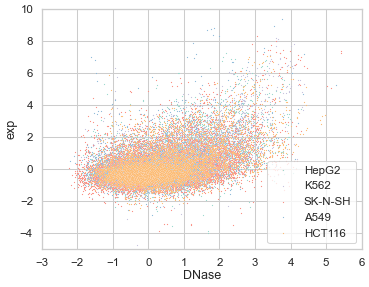

In [8]:
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
for i, cell_type in enumerate(cell_types):
    x = MPRA_df_stack[f'{cell_type}_DNase'][:10000]
    y = MPRA_df_stack[f'{cell_type}'][:10000]
    sns.scatterplot(x=x, y=y, s=3, color=color_list[i], label=cell_type)
plt.xlim(-3, 6)
plt.ylim(-5, 10)
plt.xlabel('DNase')
plt.ylabel('exp')
plt.legend(loc="lower right")
plt.savefig('figures/DNase_exp', dpi=400)
plt.show()

/tmp/ipykernel_17508/3447054891.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


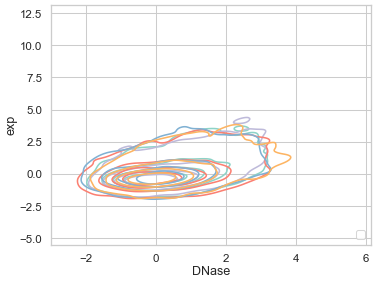

In [9]:
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
for i, cell_type in enumerate(cell_types):
    x = MPRA_df_stack[f'{cell_type}_DNase'][:10000]
    y = MPRA_df_stack[f'{cell_type}'][:10000]
    sns.kdeplot(x=x, y=y, color=color_list[i], label=cell_type, levels=5)
plt.xlabel('DNase')
plt.ylabel('exp')
plt.legend(loc="lower right")
plt.savefig('figures/kde_dnase_exp.png', dpi=400)
plt.show()

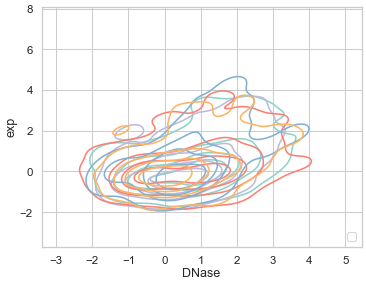

In [10]:
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
for i, cell_type in enumerate(cell_types):
    x = MPRA_df_stack[f'{cell_type}_DNase'][:1000]
    y = MPRA_df_stack[f'{cell_type}'][:1000]
    sns.kdeplot(x=x, y=y, color=color_list[i], levels=5)
plt.xlabel('DNase')
plt.ylabel('exp')
plt.legend(cell_types, loc="lower right")
plt.savefig('figures/kde_dnase_exp.png', dpi=400)
plt.show()